In [1]:
# initialization
import numpy as np

import networkx as nx

from qiskit import *
from qiskit_aer import Aer

# importing Qiskit
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

import mapomatic as mm

In [2]:
circuit = QuantumCircuit(3)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit.cx(0, 2)

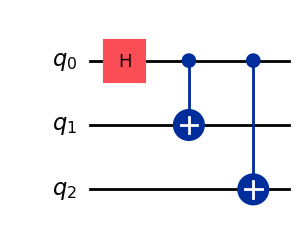

In [3]:
circuit.draw('mpl')

In [4]:
from qiskit_ibm_runtime.fake_provider import FakeAlgiers

backend = FakeAlgiers()

In [5]:
print(backend.coupling_map.get_edges())

EdgeList[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (8, 11), (9, 8), (10, 7), (10, 12), (11, 8), (11, 14), (12, 10), (12, 13), (12, 15), (13, 12), (13, 14), (14, 11), (14, 13), (14, 16), (15, 12), (15, 18), (16, 14), (16, 19), (17, 18), (18, 15), (18, 17), (18, 21), (19, 16), (19, 20), (19, 22), (20, 19), (21, 18), (21, 23), (22, 19), (22, 25), (23, 21), (23, 24), (24, 23), (24, 25), (25, 22), (25, 24), (25, 26), (26, 25)]


In [6]:
trans_qc = transpile(circuit, backend, optimization_level=3)

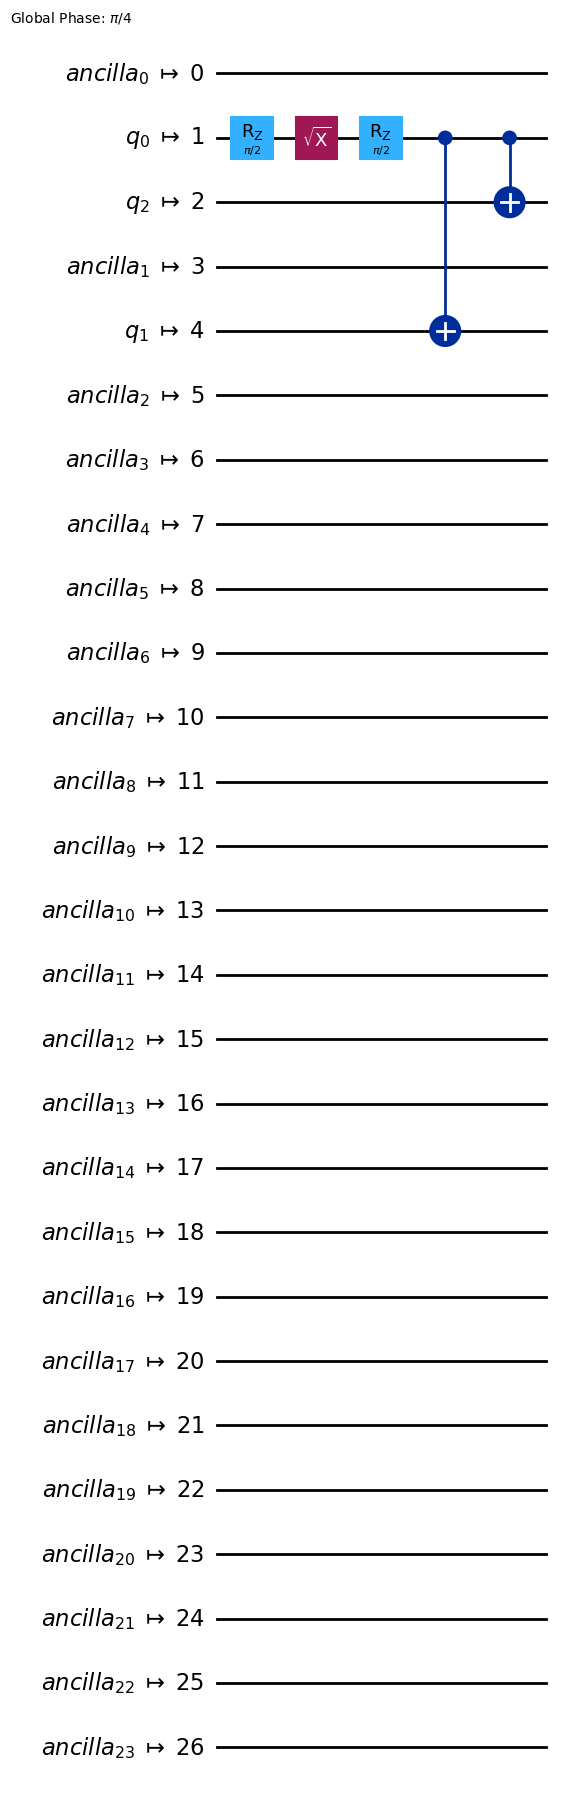

In [7]:
trans_qc.draw('mpl')

In [8]:
small_qc = mm.deflate_circuit(trans_qc)

In [9]:
layouts = mm.matching_layouts(small_qc, backend)

In [10]:
layouts

[[1, 2, 4],
 [1, 2, 0],
 [1, 4, 2],
 [1, 4, 0],
 [1, 0, 2],
 [1, 0, 4],
 [2, 1, 3],
 [2, 3, 1],
 [4, 1, 7],
 [4, 7, 1],
 [7, 4, 10],
 [7, 4, 6],
 [7, 10, 4],
 [7, 10, 6],
 [7, 6, 4],
 [7, 6, 10],
 [3, 2, 5],
 [3, 5, 2],
 [5, 3, 8],
 [5, 8, 3],
 [10, 7, 12],
 [10, 12, 7],
 [8, 5, 11],
 [8, 5, 9],
 [8, 11, 5],
 [8, 11, 9],
 [8, 9, 5],
 [8, 9, 11],
 [12, 10, 13],
 [12, 10, 15],
 [12, 13, 10],
 [12, 13, 15],
 [12, 15, 10],
 [12, 15, 13],
 [11, 8, 14],
 [11, 14, 8],
 [13, 12, 14],
 [13, 14, 12],
 [15, 12, 18],
 [15, 18, 12],
 [14, 11, 13],
 [14, 11, 16],
 [14, 13, 11],
 [14, 13, 16],
 [14, 16, 11],
 [14, 16, 13],
 [18, 15, 21],
 [18, 15, 17],
 [18, 21, 15],
 [18, 21, 17],
 [18, 17, 15],
 [18, 17, 21],
 [16, 14, 19],
 [16, 19, 14],
 [21, 18, 23],
 [21, 23, 18],
 [19, 16, 22],
 [19, 16, 20],
 [19, 22, 16],
 [19, 22, 20],
 [19, 20, 16],
 [19, 20, 22],
 [23, 21, 24],
 [23, 24, 21],
 [22, 19, 25],
 [22, 25, 19],
 [24, 23, 25],
 [24, 25, 23],
 [25, 22, 24],
 [25, 22, 26],
 [25, 24, 22],
 [25, 24,

In [11]:
scores = mm.evaluate_layouts(small_qc, layouts, backend)

In [12]:
scores

[([24, 23, 25], 0.010875922112191794),
 ([24, 25, 23], 0.010875922112191794),
 ([13, 12, 14], 0.011151497428555257),
 ([13, 14, 12], 0.011151497428555257),
 ([1, 2, 4], 0.01135291369346092),
 ([1, 4, 2], 0.01135291369346092),
 ([1, 2, 0], 0.011749271537681683),
 ([1, 0, 2], 0.011749271537681794),
 ([12, 15, 13], 0.012358822575248118),
 ([12, 13, 15], 0.01235882257524823),
 ([2, 1, 3], 0.01250009141349051),
 ([2, 3, 1], 0.01250009141349051),
 ([25, 22, 24], 0.012715632310330127),
 ([25, 24, 22], 0.012715632310330238),
 ([11, 8, 14], 0.012943373695481708),
 ([11, 14, 8], 0.012943373695481708),
 ([14, 11, 13], 0.013169379366495537),
 ([14, 13, 11], 0.013169379366495537),
 ([1, 4, 0], 0.013811758712544697),
 ([1, 0, 4], 0.013811758712544697),
 ([8, 5, 11], 0.014135802732164637),
 ([8, 11, 5], 0.014135802732164637),
 ([3, 5, 2], 0.014554245793718112),
 ([3, 2, 5], 0.014554245793718223),
 ([8, 11, 9], 0.014977400275609343),
 ([8, 9, 11], 0.014977400275609343),
 ([5, 3, 8], 0.0150666335045213

In [13]:
best_qc = transpile(small_qc, backend, initial_layout=scores[0][0])

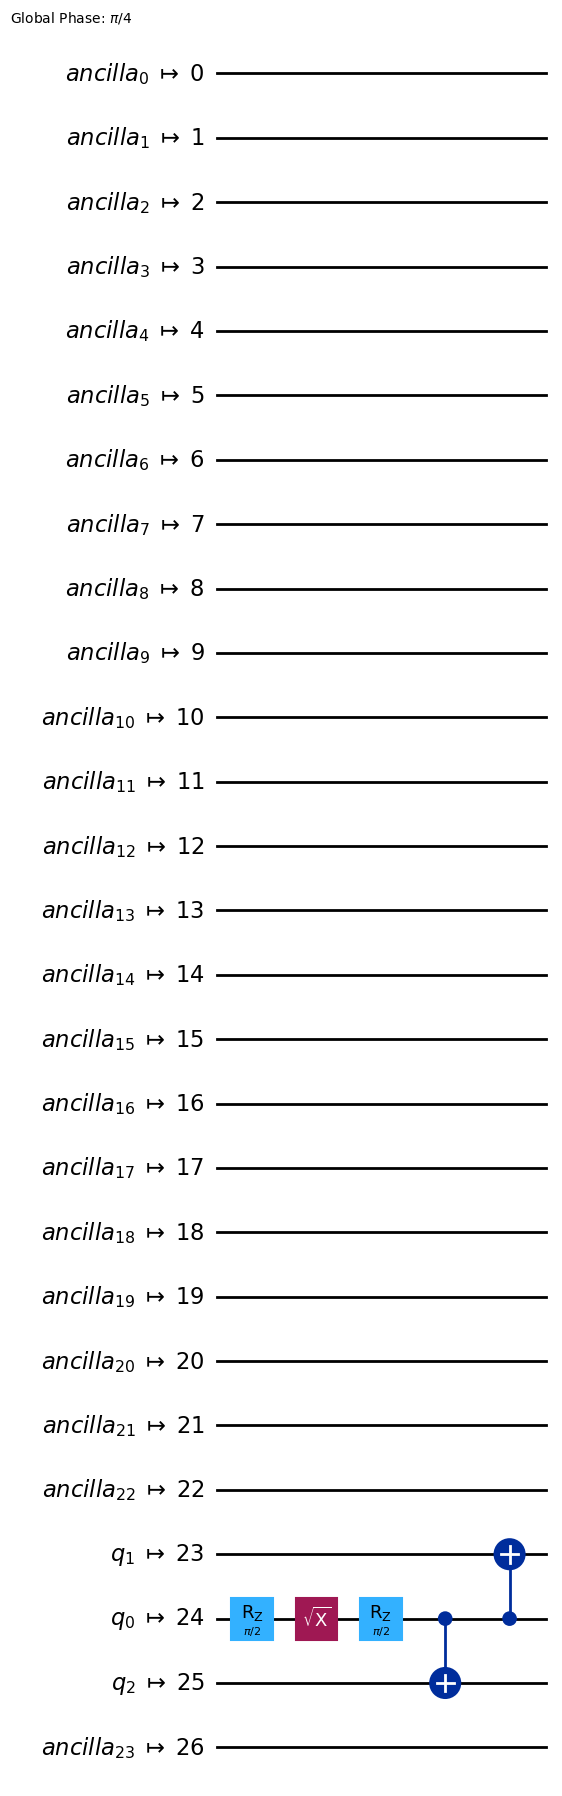

In [14]:
best_qc.draw('mpl')

In [15]:
couplings = backend.coupling_map.get_edges()

In [16]:
graph = nx.from_edgelist(couplings)

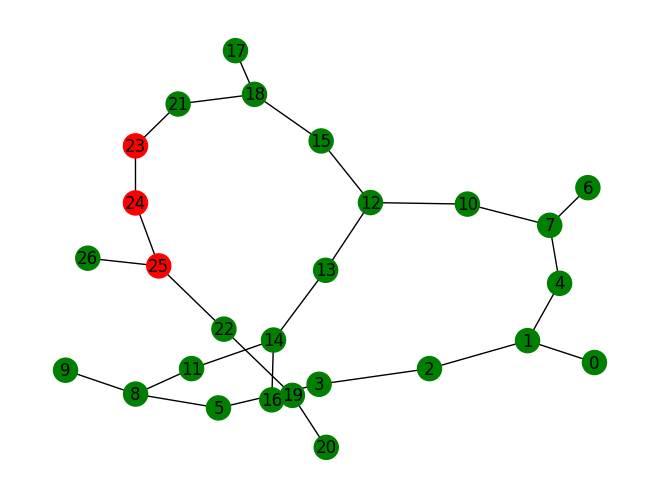

In [17]:
color_map = []
for node in graph:
    if node in scores[0][0]:
        color_map.append('red')
    else: 
        color_map.append('green')      
nx.draw(graph, node_color=color_map, with_labels=True)


In [28]:
#Circuit area computation
print(circuit.num_qubits)
print(circuit.depth())
Area = circuit.num_qubits * circuit.depth()
print(Area)

3
3
9
